In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Cleaning and EDA

In [3]:
#reading .csv file
table = pd.read_csv('C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Old data/real_estate_numbers.csv')
table

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1955,Canada,2016A000011124,Housing starts,Total units,Units,300,units,0,v730579,1.1.1,138276,NaN,NaN,NaN,0
1,1955,Canada,2016A000011124,Housing starts,Single-detached,Units,300,units,0,v730524,1.1.2,99003,NaN,NaN,NaN,0
2,1955,Canada,2016A000011124,Housing starts,Multiples,Units,300,units,0,v730568,1.1.4,39273,NaN,NaN,NaN,0
3,1955,Canada,2016A000011124,Housing starts,Semi-detached,Units,300,units,0,v730535,1.1.3,10606,NaN,NaN,NaN,0
4,1955,Canada,2016A000011124,Housing starts,Row,Units,300,units,0,v730546,1.1.5,1909,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,2019,British Columbia,2016A000259,Housing completions,Single-detached,Units,300,units,0,v732400,11.3.2,10220,NaN,NaN,NaN,0
12338,2019,British Columbia,2016A000259,Housing completions,Multiples,Units,300,units,0,v732444,11.3.4,29163,NaN,NaN,NaN,0
12339,2019,British Columbia,2016A000259,Housing completions,Semi-detached,Units,300,units,0,v732411,11.3.3,1038,NaN,NaN,NaN,0
12340,2019,British Columbia,2016A000259,Housing completions,Row,Units,300,units,0,v732422,11.3.5,4159,NaN,NaN,NaN,0


In [4]:
#checking for Null values and columns type
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           12342 non-null  int64  
 1   GEO                12342 non-null  object 
 2   DGUID              12342 non-null  object 
 3   Housing estimates  12342 non-null  object 
 4   Type of unit       12342 non-null  object 
 5   UOM                12342 non-null  object 
 6   UOM_ID             12342 non-null  int64  
 7   SCALAR_FACTOR      12342 non-null  object 
 8   SCALAR_ID          12342 non-null  int64  
 9   VECTOR             12342 non-null  object 
 10  COORDINATE         12342 non-null  object 
 11  VALUE              12342 non-null  int64  
 12  STATUS             0 non-null      float64
 13  SYMBOL             0 non-null      float64
 14  TERMINATED         0 non-null      float64
 15  DECIMALS           12342 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
#removing status, symbol and terminated 
table.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis='columns', inplace=True)
table.head(5)

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1955,Canada,2016A000011124,Housing starts,Total units,Units,300,units,0,v730579,1.1.1,138276,0
1,1955,Canada,2016A000011124,Housing starts,Single-detached,Units,300,units,0,v730524,1.1.2,99003,0
2,1955,Canada,2016A000011124,Housing starts,Multiples,Units,300,units,0,v730568,1.1.4,39273,0
3,1955,Canada,2016A000011124,Housing starts,Semi-detached,Units,300,units,0,v730535,1.1.3,10606,0
4,1955,Canada,2016A000011124,Housing starts,Row,Units,300,units,0,v730546,1.1.5,1909,0


In [6]:
#looking for numerical columns having value = 0
table.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,DECIMALS
count,12342.000000,12342.0,12342.0,12342.000000,12342.0
mean,1988.219251,300.0,0.0,12880.358127,0.0
std,18.183118,0.0,0.0,28783.303441,0.0
min,1955.000000,300.0,0.0,0.000000,0.0
25%,1973.000000,300.0,0.0,380.250000,0.0
50%,1988.000000,300.0,0.0,2231.500000,0.0
75%,2004.000000,300.0,0.0,11114.750000,0.0
max,2019.000000,300.0,0.0,274828.000000,0.0


In [7]:
#removing scalar_id and decimals
table.drop(['SCALAR_ID', 'DECIMALS'], axis='columns', inplace=True)
table.head(3)

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,VECTOR,COORDINATE,VALUE
0,1955,Canada,2016A000011124,Housing starts,Total units,Units,300,units,v730579,1.1.1,138276
1,1955,Canada,2016A000011124,Housing starts,Single-detached,Units,300,units,v730524,1.1.2,99003
2,1955,Canada,2016A000011124,Housing starts,Multiples,Units,300,units,v730568,1.1.4,39273


In [8]:
#checking for duplicate
len(table.drop_duplicates()) == len(table)

True

In [9]:
#changing REF_DATE to date format
table['REF_DATE'] = pd.to_datetime(table['REF_DATE'], format='%Y')
table.head(5)

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,VECTOR,COORDINATE,VALUE
0,1955-01-01,Canada,2016A000011124,Housing starts,Total units,Units,300,units,v730579,1.1.1,138276
1,1955-01-01,Canada,2016A000011124,Housing starts,Single-detached,Units,300,units,v730524,1.1.2,99003
2,1955-01-01,Canada,2016A000011124,Housing starts,Multiples,Units,300,units,v730568,1.1.4,39273
3,1955-01-01,Canada,2016A000011124,Housing starts,Semi-detached,Units,300,units,v730535,1.1.3,10606
4,1955-01-01,Canada,2016A000011124,Housing starts,Row,Units,300,units,v730546,1.1.5,1909


In [10]:
#checking for incorect entries
for i in table.columns:
    print('{}:{}'.format(i,table[i].unique()))

REF_DATE:['1955-01-01T00:00:00.000000000' '1956-01-01T00:00:00.000000000'
 '1957-01-01T00:00:00.000000000' '1958-01-01T00:00:00.000000000'
 '1959-01-01T00:00:00.000000000' '1960-01-01T00:00:00.000000000'
 '1961-01-01T00:00:00.000000000' '1962-01-01T00:00:00.000000000'
 '1963-01-01T00:00:00.000000000' '1964-01-01T00:00:00.000000000'
 '1965-01-01T00:00:00.000000000' '1966-01-01T00:00:00.000000000'
 '1967-01-01T00:00:00.000000000' '1968-01-01T00:00:00.000000000'
 '1969-01-01T00:00:00.000000000' '1970-01-01T00:00:00.000000000'
 '1971-01-01T00:00:00.000000000' '1972-01-01T00:00:00.000000000'
 '1973-01-01T00:00:00.000000000' '1974-01-01T00:00:00.000000000'
 '1975-01-01T00:00:00.000000000' '1976-01-01T00:00:00.000000000'
 '1977-01-01T00:00:00.000000000' '1978-01-01T00:00:00.000000000'
 '1979-01-01T00:00:00.000000000' '1980-01-01T00:00:00.000000000'
 '1981-01-01T00:00:00.000000000' '1982-01-01T00:00:00.000000000'
 '1983-01-01T00:00:00.000000000' '1984-01-01T00:00:00.000000000'
 '1985-01-01T00:

<Axes: >

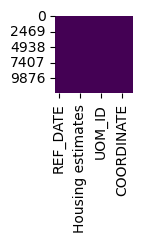

In [11]:
#Visualizing missing value
plt.figure(figsize=(1,1))
sns.heatmap(table.isnull(), cbar=False,cmap='viridis')

In [11]:
#saving file
table.to_csv('C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Cleaned data/real_estate_numbers.csv', index=False)
